# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

     -------------------------------------- 675.6/675.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=fbfa09499b51765f440c07765329775d442733f923f685af44ad8a71b5c88f8a
  Stored in directory: c:\users\adwoa\appdata\local\pip\cache\wheels\49\05\c1\6baa8ceb020ca642133e903591948e0fbe269e9c519aefd95d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=Metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city 
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | turbat
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | las tablas
Processing Record 6 of Set 1 | tuyum
Processing Record 7 of Set 1 | mount pleasant
Processing Record 8 of Set 1 | santana
Processing Record 9 of Set 1 | masina
Processing Record 10 of Set 1 | czarnkow
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | porbandar
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | mata-utu
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | letlhakane
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | mimizan
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | arraial do cabo
Processin

Processing Record 42 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 43 of Set 4 | undurkhaan
Processing Record 44 of Set 4 | kulia village
City not found. Skipping...
Processing Record 45 of Set 4 | okha
Processing Record 46 of Set 4 | arica
Processing Record 47 of Set 4 | korla
Processing Record 48 of Set 4 | zeya
Processing Record 49 of Set 4 | wicklow
Processing Record 0 of Set 5 | hamilton
Processing Record 1 of Set 5 | mushie
Processing Record 2 of Set 5 | pedra azul
Processing Record 3 of Set 5 | salekhard
Processing Record 4 of Set 5 | mambajao
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | majene
Processing Record 7 of Set 5 | oranjemund
Processing Record 8 of Set 5 | dwarka
Processing Record 9 of Set 5 | nyurba
Processing Record 10 of Set 5 | ladario
Processing Record 11 of Set 5 | magadan
Processing Record 12 of Set 5 | sinop
Processing Record 13 of Set 5 | shagonar
Processing Record 14 of Set 5 | sandnessjoen
Processing Record 1

Processing Record 31 of Set 8 | sausset-les-pins
Processing Record 32 of Set 8 | seaside
Processing Record 33 of Set 8 | katpur
Processing Record 34 of Set 8 | pacasmayo
Processing Record 35 of Set 8 | parambu
Processing Record 36 of Set 8 | timbuktu
Processing Record 37 of Set 8 | al bardiyah
Processing Record 38 of Set 8 | victoria falls
Processing Record 39 of Set 8 | berdigestyakh
Processing Record 40 of Set 8 | shimoda
Processing Record 41 of Set 8 | al manshah
Processing Record 42 of Set 8 | katsuura
Processing Record 43 of Set 8 | craig
Processing Record 44 of Set 8 | san antonio de pale
Processing Record 45 of Set 8 | ust-tsilma
Processing Record 46 of Set 8 | bembereke
Processing Record 47 of Set 8 | zag
Processing Record 48 of Set 8 | san felipe
Processing Record 49 of Set 8 | tanjung selor
City not found. Skipping...
Processing Record 0 of Set 9 | phang nga
Processing Record 1 of Set 9 | punta del este
Processing Record 2 of Set 9 | qaqortoq
Processing Record 3 of Set 9 | ar

Processing Record 18 of Set 12 | mtsamboro
Processing Record 19 of Set 12 | smara
Processing Record 20 of Set 12 | kapa'a
Processing Record 21 of Set 12 | dailekh
Processing Record 22 of Set 12 | el quebrachal
Processing Record 23 of Set 12 | kuta
Processing Record 24 of Set 12 | saint-philippe
Processing Record 25 of Set 12 | villa gesell
Processing Record 26 of Set 12 | pervomayskaya
Processing Record 27 of Set 12 | island harbour
Processing Record 28 of Set 12 | yanykurgan
Processing Record 29 of Set 12 | soio
Processing Record 30 of Set 12 | rumbek
Processing Record 31 of Set 12 | rio gallegos
Processing Record 32 of Set 12 | brisas de zicatela
Processing Record 33 of Set 12 | tubarjal
Processing Record 34 of Set 12 | canmore
Processing Record 35 of Set 12 | garachico
Processing Record 36 of Set 12 | alo
Processing Record 37 of Set 12 | puerto aysen
Processing Record 38 of Set 12 | cortez
Processing Record 39 of Set 12 | samarinda
Processing Record 40 of Set 12 | capo d'orlando
Pro

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-0.01,73,8,5.48,SJ,1685112529
1,turbat,26.0023,63.0440,35.99,41,4,7.08,PK,1685112529
2,albany,42.6001,-73.9662,17.93,45,0,1.34,US,1685112251
3,port elizabeth,-33.9180,25.5701,17.83,58,0,7.20,ZA,1685112529
4,las tablas,7.7667,-80.2833,26.31,82,100,1.96,PA,1685112529


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-0.01,73,8,5.48,SJ,1685112529
1,turbat,26.0023,63.0440,35.99,41,4,7.08,PK,1685112529
2,albany,42.6001,-73.9662,17.93,45,0,1.34,US,1685112251
3,port elizabeth,-33.9180,25.5701,17.83,58,0,7.20,ZA,1685112529
4,las tablas,7.7667,-80.2833,26.31,82,100,1.96,PA,1685112529


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

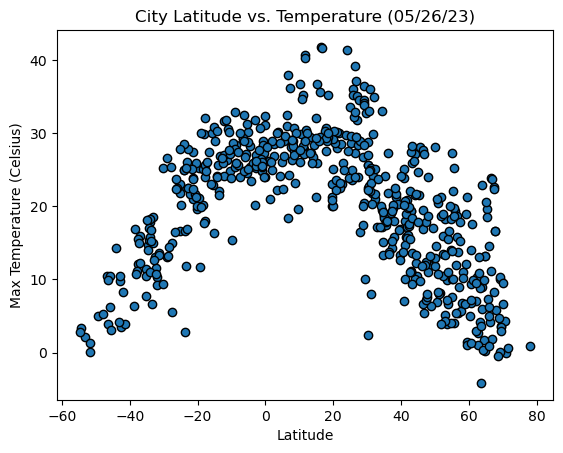

In [60]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor= 'black', marker= 'o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (Celsius)')
plt.xlabel('Latitude')


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

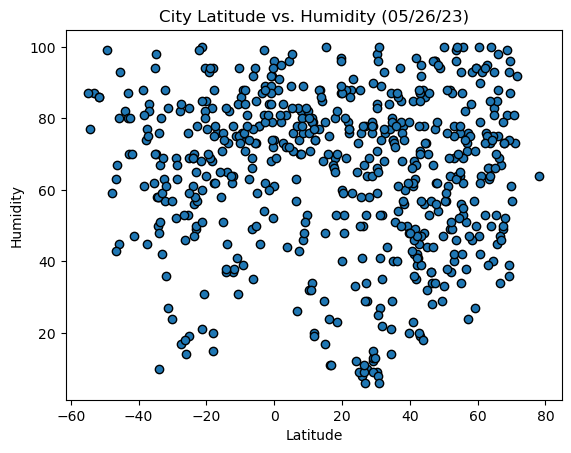

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor= 'black', marker= 'o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

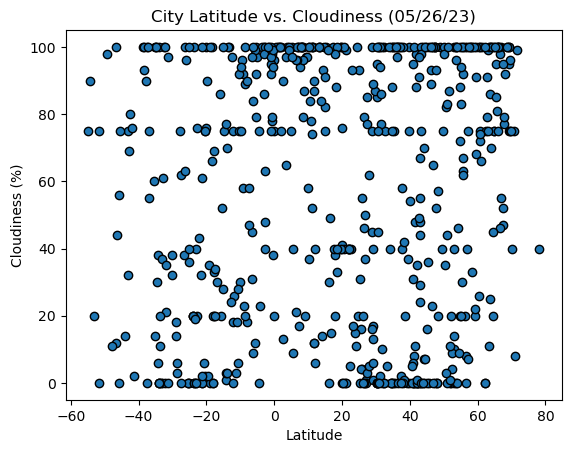

In [62]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor= 'black', marker= 'o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

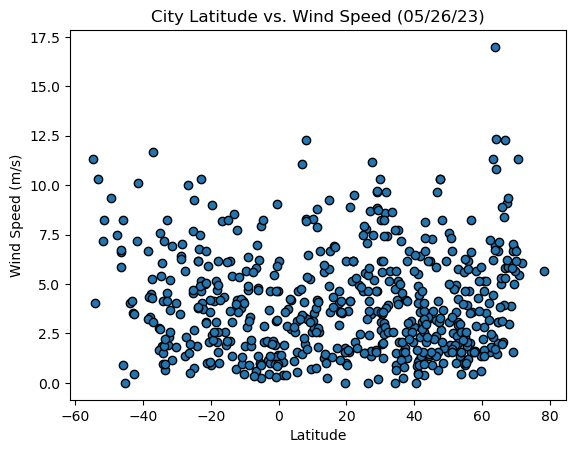

In [63]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor= 'black', marker= 'o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-0.01,73,8,5.48,SJ,1685112529
1,turbat,26.0023,63.0440,35.99,41,4,7.08,PK,1685112529
2,albany,42.6001,-73.9662,17.93,45,0,1.34,US,1685112251
4,las tablas,7.7667,-80.2833,26.31,82,100,1.96,PA,1685112529
5,tuyum,9.9769,122.5582,27.55,82,58,2.55,PH,1685112529


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port elizabeth,-33.9180,25.5701,17.83,58,0,7.20,ZA,1685112529
7,santana,-0.0583,-51.1817,31.10,74,75,4.63,BR,1685112530
8,masina,-4.3836,15.3914,28.19,78,75,2.06,CD,1685112494
10,edinburgh of the seven seas,-37.0676,-12.3116,15.89,84,55,11.67,SH,1685112530
12,waitangi,-43.9535,-176.5597,14.34,82,14,4.02,NZ,1685112530


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5744217228535129


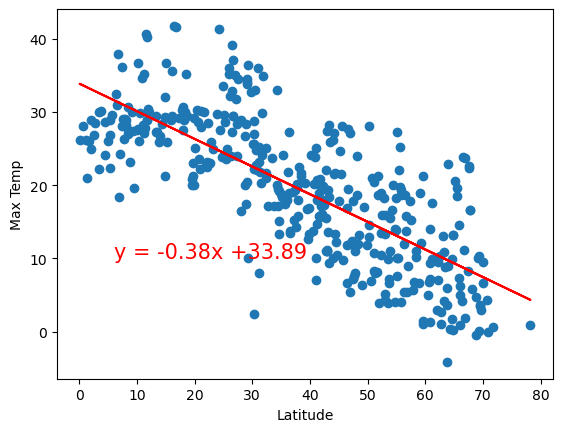

In [66]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(6,10), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()


The r-value is: 0.7026476360108073


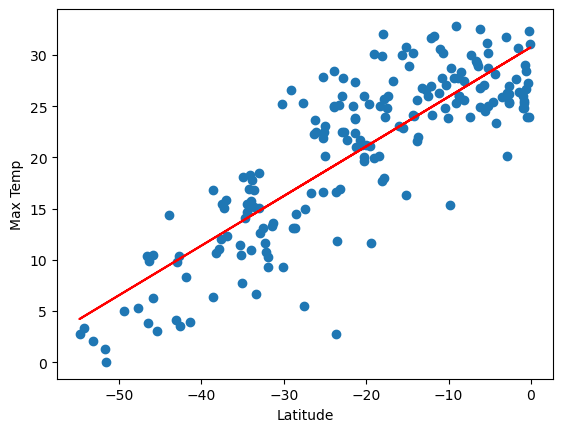

In [68]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** There is a negative correlation between the Latitude and Temp in the northern hemisphere and a positive correlation between the Latitude and Temp in the southern hemisphere. If we were to combine the two figures, we'd see that the temp increases as we approach 0 latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0010535542898607753


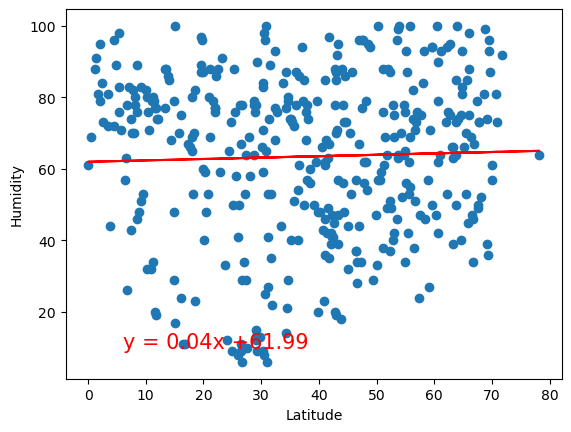

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.009015383564716846


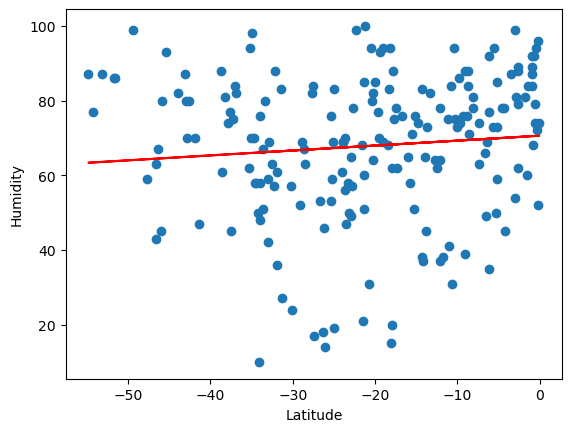

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** There isn't much of a correlation between Humidity and Latitude. On both figures we can see that the line of best fits is almost horizontal and it has a very small amount of points on it. To take it one step further, the r values for both figures are very small. With this information, it's safe to say that Latitude doesn't have the same effect on Humidity as it does on Temp

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 8.156339094159009e-05


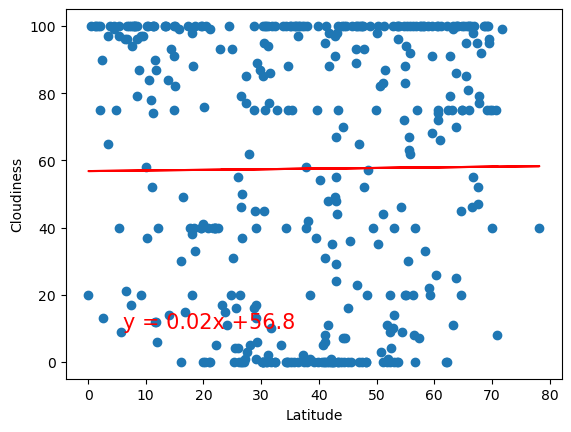

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.040465181083792864


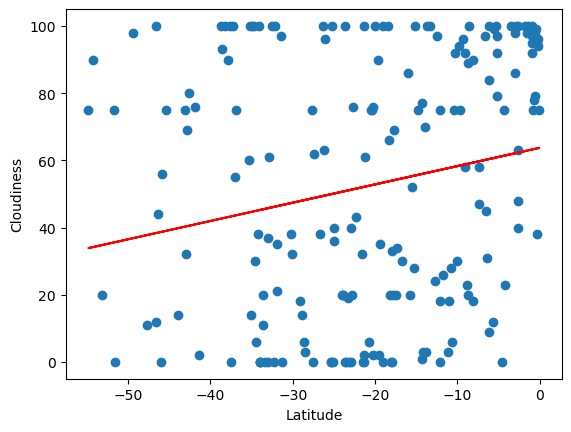

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Cloudiness is interesting because the northern and southern hemispheres give us very differnt information. In the northern hemisphere, the r value is extremely small. Meaning there is (almost) no correlation at all. In the southern hemisphere, while there isnt a huge correlation, it's very obvious there there is a (weak) positive correlation. From this we can say Latitude has no effect cloudiness in the northern hemisphere but has a small effect in the southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007982358791486129


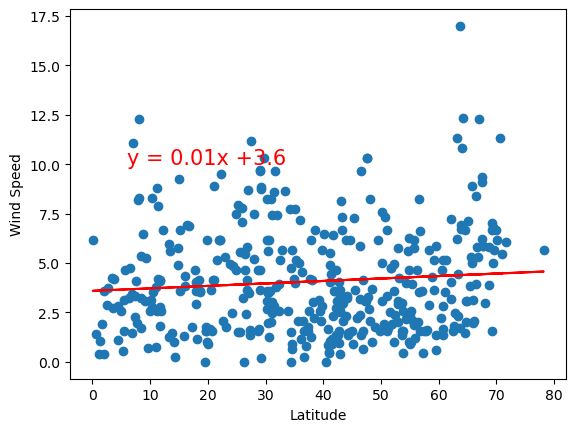

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.08957388987638468


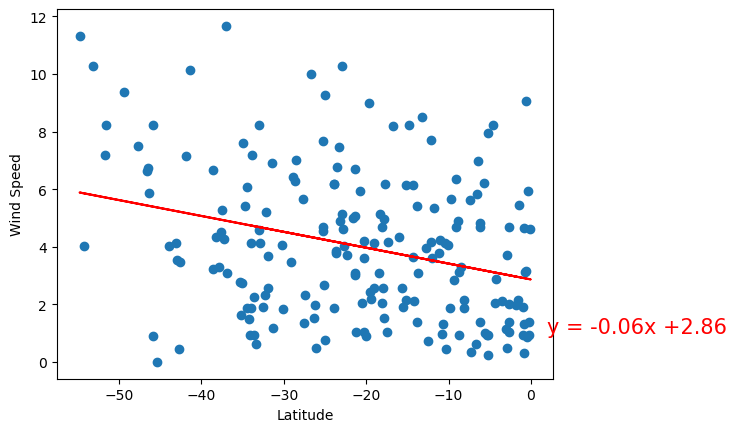

In [88]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(2,1),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** latitude has no effect on wind speed in the northern hemisphere. Our line of best fits is almost perfectly horizontal and the r value is very much below one. The southern hemisphere has a weak negatiave correlation. 